<a href="https://colab.research.google.com/github/tiagoflorin/DataScience1/blob/clase_5/Copia_de_Clase_5_act.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Standard
from bokeh.io import output_notebook, show, reset_output
# Other
import bokeh
from bokeh.plotting import figure

# Grafico de barras

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/ven-27/datasets/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.Survived.unique()

array([0, 1])

In [ ]:
df.Sex.value_counts()

,count
Sex,
male,577
female,314


In [ ]:
df_n=df[['Survived','Sex','Pclass']].groupby(by=['Sex','Pclass']).count().reset_index()
df_n.head()

,Sex,Pclass,Survived
0,female,1,94
1,female,2,76
2,female,3,144
3,male,1,122
4,male,2,108


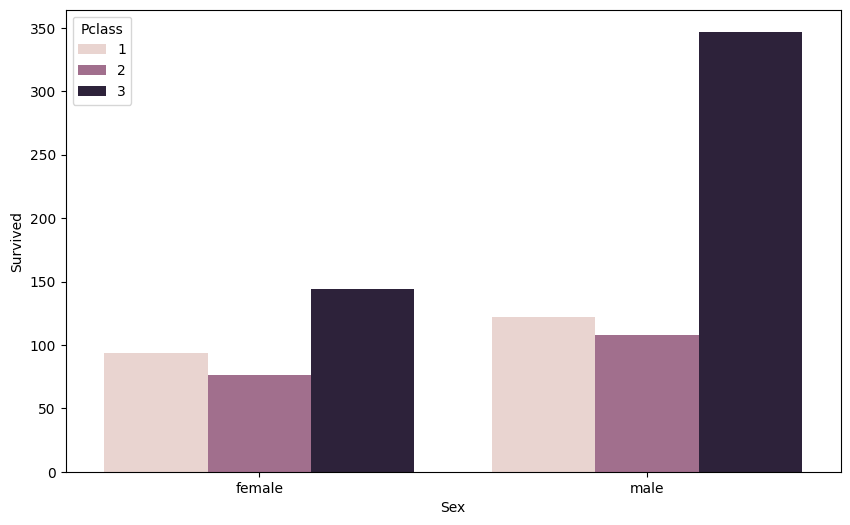

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(y='Survived',x='Sex',hue='Pclass',data=df_n);

Miremos un ejemplo con Bokeh

In [ ]:
df_x=df[['Survived','Pclass']].groupby(by=['Pclass']).count().reset_index()
df_x['Pclass']=df_x['Pclass'].astype('str')
df_x.head()

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [ ]:
from bokeh.palettes import Spectral6
from bokeh.models import HoverTool
from bokeh.io import show, output_notebook
output_notebook()
from bokeh.embed import file_html
from bokeh.models import CategoricalColorMapper, ColumnDataSource, FactorRange
from bokeh.plotting import figure, output_file

In [ ]:
source = ColumnDataSource(data=dict(Pclass=df_x.Pclass, counts=df_x.Survived, color=Spectral6))
# Use 'height' instead of 'plot_height' to set the plot height.
p = figure(x_range=df_x.Pclass, height=250, title="Clases involucradas")
p.vbar(x='Pclass', top='counts', width=0.9, color='color', legend_label="Pclass", source=source)
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Clase"
p.yaxis.axis_label = "Frecuencia"
p.legend.orientation = "horizontal"
p.legend.location = "top_center"
p.add_tools(HoverTool())
show(p)
output_file("stacked.html") # Si la quieren guardar


Grafico de barras acoplado con una tercera variable

# Histogramas

<Axes: xlabel='Fare', ylabel='Count'>

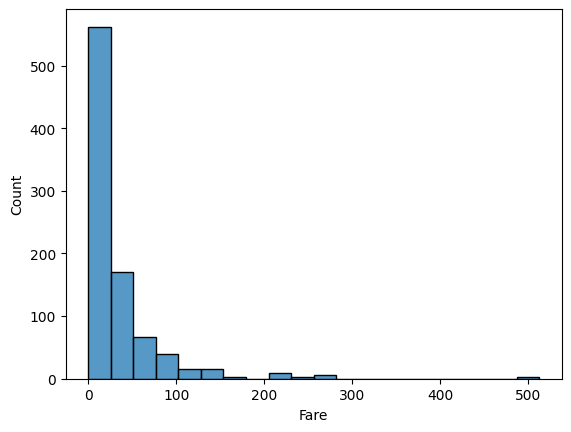

In [ ]:
sns.histplot(data=df, x="Fare",bins=20)

<Axes: xlabel='Age', ylabel='Count'>

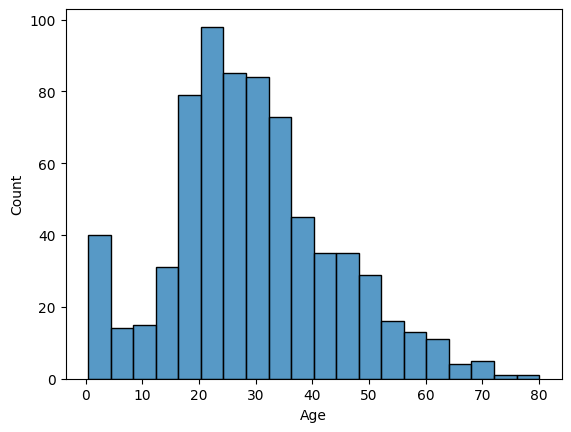

In [ ]:
sns.histplot(data=df, x="Age",bins=20)

Ahora con Bokeh

In [ ]:
import numpy as np
from bokeh.io import show, output_file
from bokeh.io import show, output_notebook
output_notebook()
from bokeh.plotting import figure
data = df.Age.values
data=data[~np.isnan(data)]
hist, edges = np.histogram(data, density=True, bins=20)
p = figure(height=300, width=500, title='Histograma de edades')
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")
p.xaxis.axis_label = "Edad"
p.yaxis.axis_label = "Frecuencia"
p.add_tools(HoverTool())
#output_file("hist.html")
show(p)

In [ ]:
data = df.Fare.values
data=data[~np.isnan(data)]
hist, edges = np.histogram(data, density=True, bins=20)
p = figure(height=300,width=500, title='Histograma de tarifas')
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")
p.xaxis.axis_label = "Tarifa (USD)"
p.yaxis.axis_label = "Frecuencia"
p.add_tools(HoverTool())
#output_file("hist.html")
show(p)

# Lineplot

<ipython-input-35-3a96100e06be>:4: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(price_date, price_close, linestyle='solid') # Graficar la serie de tiempo
<ipython-input-35-3a96100e06be>:4: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot_date(price_date, price_close, linestyle='solid') # Graficar la serie de tiempo


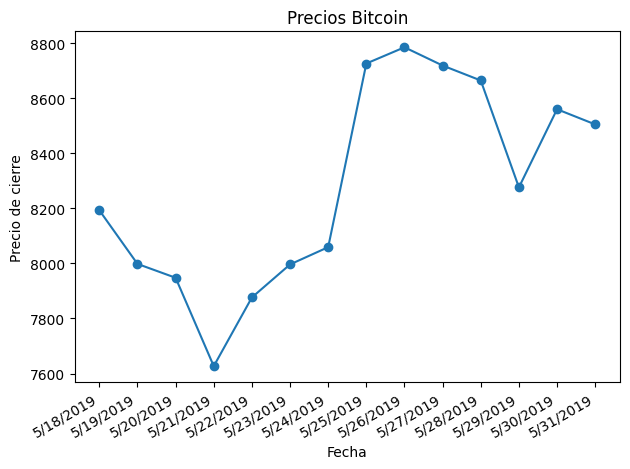

In [ ]:
data=pd.read_csv('/content/gdrive/MyDrive/Data Science 1 curso/Clase 5/Copia de Time Series Data.csv') # Leer el archivo
price_date=data['Date'] # extraer dos vectores uno para la fecha
price_close=data['Close'] # extraer el precio de cierre en vector
plt.plot_date(price_date, price_close, linestyle='solid') # Graficar la serie de tiempo
plt.gcf().autofmt_xdate() # Darle formato fecha al eje x
plt.title('Precios Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.tight_layout() # Ajustar los ejes
plt.show() # mostrar la grafica

In [ ]:
data.Date= pd.to_datetime(data.Date)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-18,7266.080078,8281.660156,7257.259766,8193.139648,8193.139648,723011166
1,2019-05-19,8193.139648,8193.139648,7591.850098,7998.290039,7998.290039,637617163
2,2019-05-20,7998.290039,8102.319824,7807.770020,7947.930176,7947.930176,357803946
3,2019-05-21,7947.930176,8033.759766,7533.660156,7626.890137,7626.890137,424501866
4,2019-05-22,7626.890137,7971.259766,7478.740234,7876.500000,7876.500000,386766321
5,2019-05-23,7876.500000,8165.450195,7801.569824,7996.399902,7996.399902,413162746
6,2019-05-24,7996.399902,8140.819824,7948.680176,8059.129883,8059.129883,179206342
7,2019-05-25,8059.129883,8779.000000,7894.529785,8726.230469,8726.230469,483663699
8,2019-05-26,8726.230469,8931.530273,8668.459961,8785.169922,8785.169922,507164714
9,2019-05-27,8785.169922,8818.709961,8562.200195,8718.849609,8718.849609,360752199


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
9,2019-05-27,8785.169922,8818.709961,8562.200195,8718.849609,8718.849609,360752199
10,2019-05-28,8718.849609,8760.480469,8444.099609,8664.559570,8664.559570,380343928
11,2019-05-29,8664.559570,9065.889648,8027.209961,8276.250000,8276.250000,815525590
12,2019-05-30,8276.250000,8570.780273,8116.000000,8560.080078,8560.080078,500141087
13,2019-05-31,8550.629883,8576.339844,8459.650391,8504.980469,8504.980469,69915456


Ahora con Bokeh

In [ ]:
from bokeh.models import DatetimeTickFormatter, Legend, LegendItem
data.Date= pd.to_datetime(data.Date) # Convertir a Datetime
line_plot = figure(width=600, height=500, title='Line plot',
                   x_axis_label='Fecha', y_axis_label='Precio',x_axis_type='datetime')
r1 = line_plot.line(data.Date, data['Open'], line_width=2) # create renderer for the first line
r2 = line_plot.line(data.Date, data['High'], line_width=2,color='red') # create renderer for the second line
r3 = line_plot.line(data.Date, data['Low'], line_width=2,color='green') # create renderer for the third line
r4 = line_plot.line(data.Date, data['Close'], line_width=2,color='yellow') # create renderer for the fourth line
# create legend items
legend_items = [LegendItem(label="Open", renderers=[r1]),
                LegendItem(label="High", renderers=[r2]),
                LegendItem(label="Low", renderers=[r3]),
                LegendItem(label="Close", renderers=[r4])]
# create legend
legend = Legend(items=legend_items, location="top_left")
# add legend to the plot
line_plot.add_layout(legend)

#The parameters hours, days, months, and years should be strings, not lists.
line_plot.xaxis.formatter=DatetimeTickFormatter(
        hours="%d %B %Y",  # Changed to string
        days="%d %B %Y",  # Changed to string
        months="%d %B %Y", # Changed to string
        years="%d %B %Y") # Changed to string
line_plot.add_tools(HoverTool())
#line_plot.legend.location = "top_left" # No longer needed
show(line_plot)

# Diagrama de dispersion

Text(0, 0.5, 'Precio de apertura')

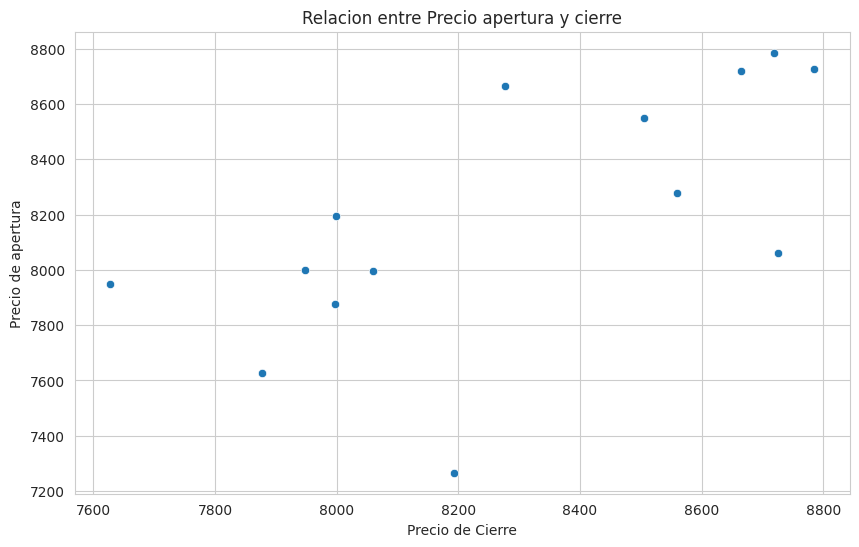

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.scatterplot(x=data.Close, y= data.Open)
plt.title('Relacion entre Precio apertura y cierre')
plt.xlabel('Precio de Cierre')
plt.ylabel('Precio de apertura')

In [ ]:
np.corrcoef(data.Close, data.Open)[1,0]

np.float64(0.6460061682850231)

In [ ]:
# Matriz de correlacion
import numpy as np
np.corrcoef(data.Close, data.Open)

array([[1.        , 0.64600617],
       [0.64600617, 1.        ]])

In [ ]:
# Seleccion de datos
from bokeh.models import Range1d
x_scatter = data.Close # Data en x
y_scatter = data.Open # data en y
# Grafico (Fondo)
scatter_plot = figure(width=700, height=300, x_axis_label='Close', y_axis_label='Open', title='Dispersion Open vs Close')
# Scatter plot
scatter_plot.scatter(x_scatter, y_scatter, size=5, line_color='navy', fill_color='orange', fill_alpha=0.5)
# Agregar opcion interactiva
scatter_plot.add_tools(HoverTool())
# Mostrar
scatter_plot.y_range= Range1d(7400, 8800) # Definir limites
show(scatter_plot)

# Boxplot

Text(0, 0.5, 'Tarifa')

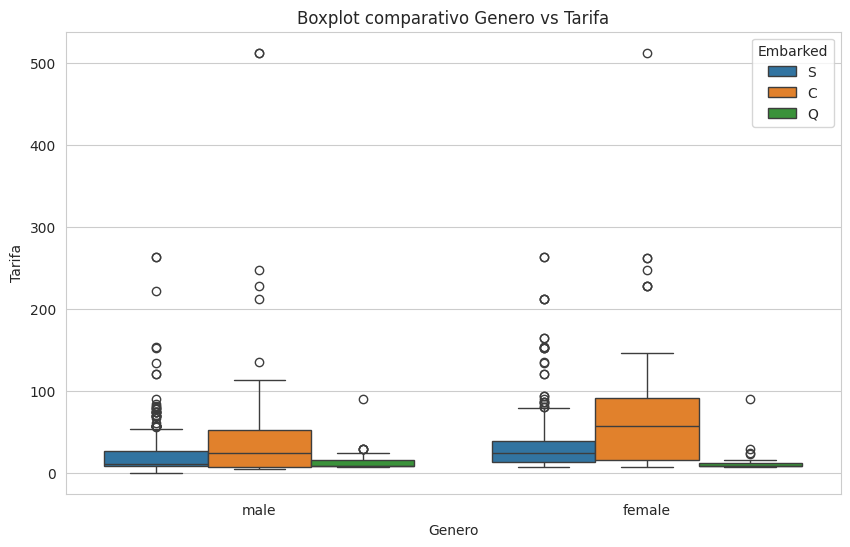

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df.Sex, y= df.Fare, hue=df.Embarked)
plt.title('Boxplot comparativo Genero vs Tarifa')
plt.xlabel('Genero')
plt.ylabel('Tarifa')

Text(0, 0.5, 'Tarifa')

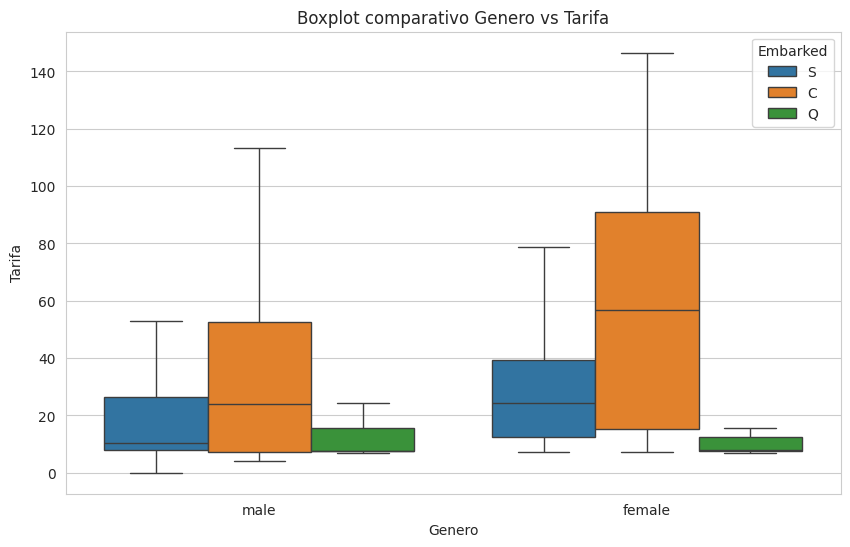

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df.Sex, y= df.Fare, hue=df.Embarked,showfliers=False)
plt.title('Boxplot comparativo Genero vs Tarifa')
plt.xlabel('Genero')
plt.ylabel('Tarifa')

Text(0, 0.5, 'Tarifa')

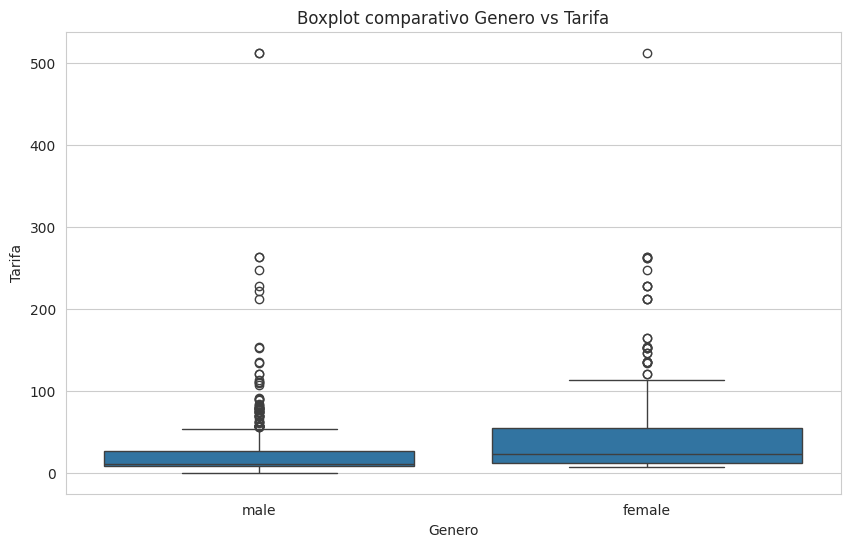

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df.Sex, y= df.Fare)
plt.title('Boxplot comparativo Genero vs Tarifa')
plt.xlabel('Genero')
plt.ylabel('Tarifa')

In [ ]:
# Agrupar el DataFrame por la columna 'Sex' y seleccionar solo la columna 'Fare' para los cálculos
groups = df[['Sex','Fare']].groupby('Sex')
# Explicación:
# - `df[['Sex','Fare']]`: Selecciona solo las columnas necesarias ('Sex', 'Fare') del DataFrame original.
# - `.groupby('Sex')`: Agrupa las filas del DataFrame basándose en los valores únicos de la columna 'Sex' ('female', 'male').
# - `groups`: Es un objeto DataFrameGroupBy. Contiene la información agrupada, lista para realizar cálculos sobre cada grupo por separado.

# Calcular los cuartiles para la columna 'Fare' DENTRO de cada grupo ('Sex')
q1 = groups.quantile(q=0.25) # Primer cuartil (Percentil 25)
q2 = groups.quantile(q=0.50) # Segundo cuartil (Mediana, Percentil 50)
q3 = groups.quantile(q=0.75) # Tercer cuartil (Percentil 75)
# Explicación:
# - `.quantile(q=...)`: Calcula el cuantil especificado para la columna numérica ('Fare') en cada grupo.
# - q1, q2, q3 serán Series de Pandas indexadas por 'Sex', conteniendo el valor del cuantil correspondiente para 'Fare'.
#   Ejemplo de q1:
#   Sex
#   female    10.98855
#   male       7.89580
#   Name: Fare, dtype: float64

# Calcular el Rango Intercuartílico (IQR) para cada grupo
iqr = q3 - q1
# Explicación:
# - El IQR mide la dispersión de la mitad central de los datos (Q3 - Q1). Se calcula por separado para 'female' y 'male'.

# Calcular los límites para la detección de outliers (método estándar de 1.5 * IQR)
upper = q3 + 1.5*iqr # Límite superior: Q3 + 1.5 * IQR
lower = q1 - 1.5*iqr # Límite inferior: Q1 - 1.5 * IQR
# Explicación:
# - Se calculan los "bigotes" teóricos del box plot. Cualquier punto de datos que caiga
#   fuera de estos límites (por encima de 'upper' o por debajo de 'lower') se considera
#   un valor atípico (outlier) según esta regla común. Estos límites también se calculan por grupo.

# --- 2. Identificación de Outliers ---

# Definir una función para encontrar outliers dentro de un grupo específico
def outliers(group):
    cat = group.name # Obtiene el nombre del grupo actual ('female' o 'male')
    # Accede a los límites superior e inferior calculados PREVIAMENTE para ESTA categoría ('cat')
    upper_bound = upper.loc[cat]['Fare']
    lower_bound = lower.loc[cat]['Fare']
    # Filtra el grupo actual ('group') para encontrar las filas donde 'Fare' está fuera de los límites
    # y devuelve solo los valores de 'Fare' de esas filas (los outliers)
    return group[(group.Fare > upper_bound) | (group.Fare < lower_bound)]['Fare']

# Aplicar la función 'outliers' a cada grupo en el objeto 'groups'
out = groups.apply(outliers).dropna()
# Explicación:
# - `groups.apply(outliers)`: Ejecuta la función `outliers` para cada sub-DataFrame (grupo 'female', grupo 'male').
#   El resultado es una Serie de Pandas, potencialmente con un MultiIndex (Sex, original_index),
#   conteniendo todos los valores 'Fare' identificados como outliers.
# - `.dropna()`: Elimina posibles valores NaN que podrían surgir si un grupo no tiene outliers.

# --- 3. Preparación de Datos para Plotear Outliers ---

# Preparar las coordenadas X e Y para los outliers si se encontraron algunos
if not out.empty: # Comprueba si la Serie 'out' (que contiene los outliers) no está vacía
    # Extrae el primer nivel del índice de 'out' (que es 'Sex': 'female' o 'male')
    # Esto servirá como la coordenada X categórica para cada outlier.
    outx = list(out.index.get_level_values(0))
    # Extrae los valores de 'Fare' de los outliers.
    # Esto servirá como la coordenada Y para cada outlier.
    outy = list(out.values)

# --- 4. Creación del Gráfico Box Plot con Bokeh ---

# Definir las categorías para el eje X (asegura el orden)
cats = ['female','male']

# Crear la figura de Bokeh
p = figure(background_fill_color="#efefef", # Color de fondo
           x_range=cats, # Especifica las categorías en el eje X y su orden
           title='Comparacion tarifas por genero') # Título del gráfico

qmin = groups.quantile(q=0.00) # Mínimo real por grupo
qmax = groups.quantile(q=1.00) # Máximo real por grupo

# --- 4b. Dibujar los Componentes del Box Plot ---

# Dibujar los "tallos" o "bigotes" (líneas verticales desde la caja hasta los límites)
# Nota: Usa los límites calculados con 1.5*IQR (upper.Fare, lower.Fare)
p.segment(x0=cats, y0=upper.Fare, x1=cats, y1=q3.Fare, line_color="black") # Tallo superior (de Q3 al límite superior)
p.segment(x0=cats, y0=lower.Fare, x1=cats, y1=q1.Fare, line_color="black") # Tallo inferior (de Q1 al límite inferior)

# Dibujar las "cajas" (rectángulos que representan el IQR)
# Se usan dos vbar para poder colorear diferente la parte superior e inferior de la caja (respecto a la mediana)
p.vbar(x=cats, width=0.7, bottom=q2.Fare, top=q3.Fare, fill_color="#E08E79", line_color="black") # Caja superior (de Mediana a Q3)
p.vbar(x=cats, width=0.7, bottom=q1.Fare, top=q2.Fare, fill_color="#3B8686", line_color="black") # Caja inferior (de Q1 a Mediana)

# Dibujar las "tapas" de los bigotes (pequeños rectángulos horizontales en los extremos)
# Nota: Usa los límites calculados con 1.5*IQR (upper.Fare, lower.Fare)
p.rect(x=cats, y=lower.Fare, width=0.2, height=0.01, line_color="black") # Tapa inferior
p.rect(x=cats, y=upper.Fare, width=0.2, height=0.01, line_color="black") # Tapa superior

# Dibujar los outliers (si existen)
if not out.empty: # Solo si se encontraron outliers
    # Usa las coordenadas 'outx' (categoría 'Sex') y 'outy' (valor 'Fare') preparadas antes
    p.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6) # Dibuja círculos para cada outlier

# --- 5. Estilización Final y Visualización ---

# Personalizar la apariencia del gráfico
# p.xgrid.grid_line_color = None # Ocultar líneas de cuadrícula verticales (comentado)
p.ygrid.grid_line_color = "white" # Color de las líneas de cuadrícula horizontales
p.grid.grid_line_width = 2 # Grosor de las líneas de cuadrícula
p.xaxis.major_label_text_font_size="16px" # Tamaño de fuente para 'female', 'male'
p.xaxis.axis_label ='Genero' # Etiqueta del eje X
p.yaxis.axis_label='Fare' # Etiqueta del eje Y

# Añadir herramienta interactiva de Hover
# Permite ver información (como coordenadas) al pasar el ratón sobre los elementos del gráfico
p.add_tools(HoverTool())

# Mostrar el gráfico generado
show(p)

<ipython-input-52-a1627e882dcc>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  out = groups.apply(outliers).dropna()
<ipython-input-52-a1627e882dcc>:23: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  upper.score = [min([x,y]) for (x,y) in zip(list(qmax.loc[:,'Fare']),upper.Fare)]
<ipython-input-52-a1627e882dcc>:24: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  lower.score = [max([x,y]) for (x,y) in zip(list(qmin.loc[:,'Fare']),lower.Fare)]


# Graficos de 3 dimensiones

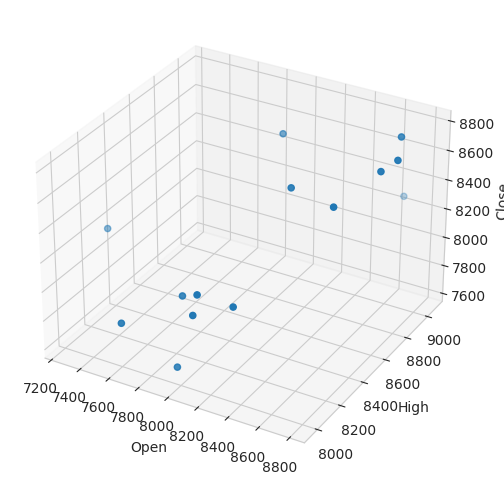

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection = '3d')

x = data.Open
y = data.High
z = data.Close

ax.set_xlabel("Open")
ax.set_ylabel("High")
ax.set_zlabel("Close")

ax.scatter(x, y, z)

plt.show()

# Radar plot

In [ ]:
# Obtener los datos
from vega_datasets import data

# Mostrar los datos
df = data.cars()
df.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [ ]:
# Atributos para el radar plot.
factors = ['Acceleration', 'Displacement', 'Horsepower',
           'Miles_per_Gallon', 'Weight_in_lbs']

# Nueva escala de 0 a 100.
new_max = 100
new_min = 0
new_range = new_max - new_min

# Hacer una transformacion lineal para cada variable a [0, 100].
for factor in factors:
  max_val = df[factor].max()
  min_val = df[factor].min()
  val_range = max_val - min_val
  df[factor + '_Adj'] = df[factor].apply(
      lambda x: (((x - min_val) * new_range) / val_range) + new_min)


# Añadir el año a cada nombre del carro
df['Car Model'] = df.apply(lambda row: '{} {}'.format(row.Name, row.Year.year), axis=1)

# recortar y cambiar el nombre.
dft = df.loc[:, ['Car Model', 'Acceleration_Adj', 'Displacement_Adj',
                 'Horsepower_Adj', 'Miles_per_Gallon_Adj',
                 'Weight_in_lbs_Adj']]

dft.rename(columns={
    'Acceleration_Adj': 'Acceleration',
    'Displacement_Adj': 'Displacement',
    'Horsepower_Adj': 'Horsepower',
    'Miles_per_Gallon_Adj': 'MPG',
    'Weight_in_lbs_Adj': 'Weight'
}, inplace=True)

dft.set_index('Car Model', inplace=True)

dft.head()


,Acceleration,Displacement,Horsepower,MPG,Weight
Car Model,,,,,
chevrolet chevelle malibu 1970,23.809524,61.757106,45.652174,23.936170,53.614970
buick skylark 320 1970,20.833333,72.868217,64.673913,15.957447,58.973632
plymouth satellite 1970,17.857143,64.599483,56.521739,23.936170,51.686986
amc rebel sst 1970,23.809524,60.981912,56.521739,18.617021,51.601928
ford torino 1970,14.880952,60.465116,51.086957,21.276596,52.055571


(<a list of 12 Line2D ticklines objects>,
 [Text(0.0, 0, ''),
  Text(1.2566370614359172, 0, 'Displacement'),
  Text(2.5132741228718345, 0, 'Horsepower'),
  Text(3.7699111843077517, 0, 'MPG'),
  Text(5.026548245743669, 0, 'Weight'),
  Text(0.0, 0, '')])

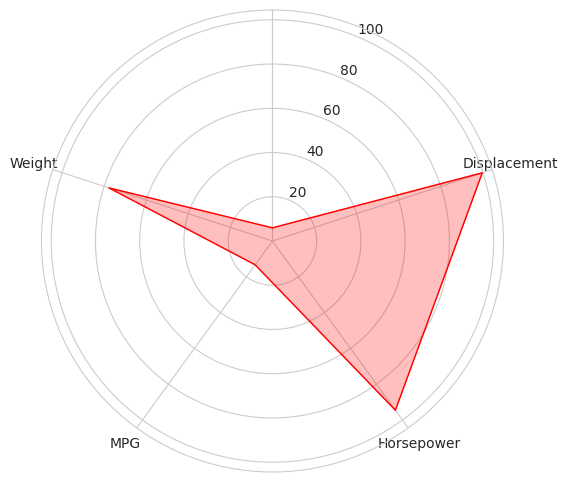

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Asumimos que 'dft' es un DataFrame de Pandas

# --- Preparación de Datos ---

# 1. Definir las etiquetas (ejes) del gráfico
# atributos para el radar chart.
labels = ['Acceleration', 'Displacement', 'Horsepower', 'MPG', 'Weight']
# Explicación:
# - Se crea una lista de Python llamada 'labels'.
# - Cada elemento de esta lista es una cadena de texto (string).
# - Estas cadenas representan los nombres de las diferentes variables o atributos
#   que se mostrarán en cada eje del gráfico de radar. Son las "dimensiones"
#   que estás midiendo para el coche.

# 2. Obtener los valores para un coche específico
# Hacer el grafico del 1970 Chevy Impala
# Asumiendo que 'dft' es un DataFrame de Pandas donde el índice son los nombres de los coches
# y las columnas coinciden con los 'labels'.
# Ejemplo de cómo podría ser dft:
#                             Acceleration  Displacement  Horsepower   MPG  Weight
# index
# chevrolet impala 1970               11.5         454.0       220.0  14.0  4354.0
# plymouth fury iii 1970              10.5         440.0       215.0  14.0  4312.0
# ...

values = dft.loc['chevrolet impala 1970'].tolist()
# Explicación:
# - `dft.loc['chevrolet impala 1970']`: Utiliza la indexación basada en etiquetas (`.loc`)
#   de Pandas para seleccionar la fila correspondiente al coche 'chevrolet impala 1970'.
#   Esto devuelve una Serie de Pandas con los valores de esa fila.
# - `.tolist()`: Convierte esa Serie de Pandas en una lista de Python.
# - La lista 'values' ahora contiene los valores numéricos [11.5, 454.0, 220.0, 14.0, 4354.0]
#   en el mismo orden que los 'labels'. Cada valor corresponde a un label.

# 3. Calcular el número de variables
# Numero de variables a plot.
num_vars = len(labels)
# Explicación:
# - `len(labels)`: Calcula cuántos elementos hay en la lista 'labels'.
# - `num_vars` almacenará el número 5 (ya que hay 5 etiquetas/atributos).
# - Este número es crucial para dividir el círculo del radar en secciones iguales.

# --- Preparación de los Ángulos para el Gráfico Polar ---

# 4. Calcular los ángulos para cada eje
# Dividir el circulo en partes iguales y sacar los angulos
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
# Explicación:
# - `np.linspace(start, stop, num, endpoint=False)`: Función de NumPy que genera
#   números espaciados uniformemente en un intervalo.
#   - `start=0`: El ángulo inicial (0 radianes).
#   - `stop=2 * np.pi`: El ángulo final (360 grados o una vuelta completa en radianes).
#   - `num=num_vars`: El número de ángulos a generar (uno por cada label/variable).
#   - `endpoint=False`: ¡Importante! Indica que el valor `stop` (2 * np.pi) NO debe
#     incluirse en la salida. Si se incluyera, el último ángulo sería igual al
#     primero (0 y 2π son la misma posición angular), lo cual no queremos todavía.
#     Queremos N ángulos distintos para N variables.
# - `.tolist()`: Convierte el array de NumPy resultante en una lista de Python.
# - 'angles' ahora contiene una lista de ángulos en radianes, distribuidos
#   uniformemente alrededor del círculo. Por ejemplo: [0. , 1.2566, 2.5132, 3.7699, 5.0265]

# 5. Cerrar el bucle del gráfico
# Completar el loop y agregar el primer valor al ultimo
values += values[:1]
angles += angles[:1]
# Explicación:
# - Para que el gráfico de radar forme una figura cerrada (un polígono), el último
#   punto debe conectarse de nuevo con el primero.
# - `values[:1]`: Crea una sub-lista que contiene solo el primer elemento de 'values'.
# - `values += ...`: Añade (concatena) esa sub-lista al final de la lista 'values'.
# - `angles[:1]`: Crea una sub-lista que contiene solo el primer elemento de 'angles' (el ángulo 0).
# - `angles += ...`: Añade esa sub-lista al final de la lista 'angles'.
# - Ahora, 'values' tiene 6 elementos (el último es igual al primero) y 'angles'
#   también tiene 6 elementos (el último es igual al primero). Esto asegura que
#   cuando se dibuje la línea, se conecte el último punto con el inicial.

# --- Creación del Gráfico ---

# 6. Crear la figura y el eje polar
# ax = plt.subplot(polar=True) # Forma alternativa de crear un solo subplot polar
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
# Explicación:
# - `plt.subplots()`: Función de Matplotlib para crear una figura y un conjunto de subplots (ejes).
#   - `figsize=(6, 6)`: Define el tamaño de la figura en pulgadas (ancho x alto).
#   - `subplot_kw=dict(polar=True)`: Este es el argumento CLAVE. Especifica que
#     los subplots (en este caso, solo uno, `ax`) deben crearse con una proyección
#     polar (coordenadas de radio y ángulo) en lugar de la cartesiana (x, y) por defecto.
#     Esto es lo que convierte un gráfico lineal en uno de radar.
# - `fig`: Es el objeto Figura completo (el lienzo).
# - `ax`: Es el objeto Ejes (Axes), donde realmente se dibuja el gráfico polar.

# 7. Dibujar los datos (la línea del radar)
# Grafiar los datos
ax.plot(angles, values, color='red', linewidth=1)
# Explicación:
# - `ax.plot(angles, values, ...)`: Dibuja una línea en el eje polar `ax`.
#   - `angles`: Lista de ángulos (coordenada theta).
#   - `values`: Lista de valores correspondientes (coordenada radial, r).
#   - `color='red'`: Establece el color de la línea a rojo.
#   - `linewidth=1`: Establece el grosor de la línea.

# 8. Rellenar el área del gráfico
# Llenarlos (Rellenarlos)
ax.fill(angles, values, color='red', alpha=0.25)
# Explicación:
# - `ax.fill(angles, values, ...)`: Rellena el área encerrada por los puntos definidos
#   por `angles` y `values`.
#   - `color='red'`: Establece el color del relleno a rojo.
#   - `alpha=0.25`: Establece la transparencia del relleno (0=transparente, 1=opaco).
#     Un valor bajo como 0.25 permite ver a través del relleno si se superponen
#     varios gráficos de radar.

# --- Ajustes Estéticos y Etiquetas ---

# 9. Ajustar la orientación del gráfico
ax.set_theta_offset(np.pi / 2)
# Explicación:
# - `ax.set_theta_offset()`: Establece dónde debe empezar el ángulo 0 (el "norte" del gráfico).
# - `np.pi / 2`: Corresponde a 90 grados. Esto hace que el primer eje ('Acceleration')
#   aparezca en la parte superior (posición de las 12 en un reloj), que es una
#   convención común para los gráficos de radar. Por defecto, el 0 suele estar a la derecha (posición de las 3).

ax.set_theta_direction(-1)
# Explicación:
# - `ax.set_theta_direction()`: Establece la dirección en la que aumentan los ángulos.
# - `-1`: Significa dirección horaria (clockwise). Por defecto es antihoraria (counter-clockwise).
#   Esto es una preferencia estilística.

# 10. Poner las etiquetas en los ejes angulares (radios)
# Poner los labels
#Adding an empty string to labels to match the number of angles (Comentario original en inglés)
labels += [''] # Adding an empty string to close the loop visually
ax.set_thetagrids(np.degrees(angles), labels)
# Explicación:
# - `labels += ['']`: Se añade una cadena vacía al final de la lista `labels`. ¿Por qué?
#    Porque la lista `angles` se extendió para cerrar el bucle (ahora tiene 6 elementos),
#    y la función `set_thetagrids` espera que el número de etiquetas coincida con el
#    número de ángulos que se le pasan para las líneas de la cuadrícula. La cadena vacía
#    actúa como una etiqueta "fantasma" para el último ángulo (que es el mismo que el primero),
#    evitando que la primera etiqueta ('Acceleration') se imprima dos veces (una en 0° y otra en 360°).
# - `np.degrees(angles)`: Convierte la lista de ángulos de radianes a grados, que es
#   como `set_thetagrids` espera los ángulos para colocar las líneas de la cuadrícula.
# - `ax.set_thetagrids(angles_in_degrees, labels)`: Coloca las líneas de la cuadrícula
#   radial (los "radios" que van del centro hacia afuera) en las posiciones angulares
#   especificadas y les asigna las etiquetas correspondientes de la lista `labels`.

Mejor. Algunas cosas cambiaron aquí:

1. Nuestro primer eje comienza justo a las 12 en punto (o cero grados)
2. Nuestros ejes están ordenados en el sentido de las agujas del reloj, de acuerdo con la lista de atributos que alimentamos
3. Tenemos etiquetas tanto para los ejes como para las líneas de cuadrícula.
4. Los ejes y la forma roja ahora están alineados

# Graficos de Chernoff

In [ ]:
!pip install ChernoffFace

In [ ]:
from ChernoffFace import *
import numpy
import matplotlib.cm
# Generar datos artificiales
numpy.random.seed(32)
data = numpy.random.rand(16, 12)
data.shape

(16, 12)

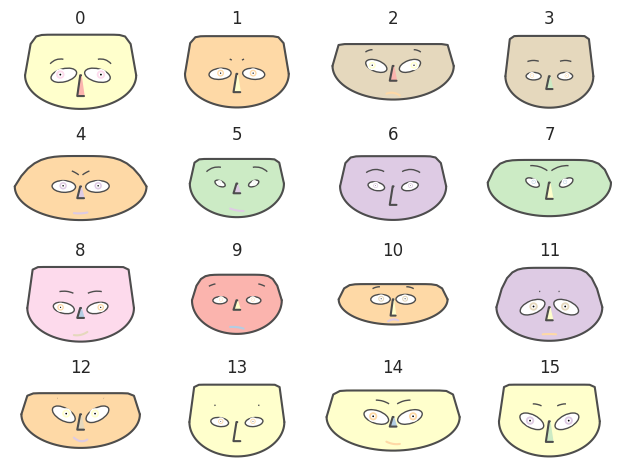

In [ ]:
fig = chernoff_face(data=data,
                    titles=[str(x) for x in list(range(len(data)))],
                    color_mapper=matplotlib.cm.Pastel1)

# Mostrarlo
fig.tight_layout()
matplotlib.pyplot.show()

In [ ]:
# Con los datos reales
prueba= df[0:400:30]
prueba= prueba[['Name','Miles_per_Gallon','Cylinders','Displacement','Weight_in_lbs','Acceleration']]
prueba.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Weight_in_lbs,Acceleration
0,chevrolet chevelle malibu,18.0,8,307.0,3504,12.0
30,amc gremlin,21.0,6,199.0,2648,15.0
60,toyota corolla 1200,31.0,4,71.0,1773,19.0
90,dodge colt (sw),28.0,4,98.0,2164,15.0
120,mercury capri v6,21.0,6,155.0,2472,14.0


In [ ]:
datos= prueba.drop(columns=['Name'])
datos= np.array(datos)
etiquetas= prueba.Name

In [ ]:
datos

array([[  18. ,    8. ,  307. , 3504. ,   12. ],
       [  21. ,    6. ,  199. , 2648. ,   15. ],
       [  31. ,    4. ,   71. , 1773. ,   19. ],
       [  28. ,    4. ,   98. , 2164. ,   15. ],
       [  21. ,    6. ,  155. , 2472. ,   14. ],
       [  26. ,    4. ,   97. , 2300. ,   14.5],
       [  24. ,    4. ,  119. , 2545. ,   17. ],
       [  29.5,    4. ,   97. , 1825. ,   12.2],
       [  29. ,    4. ,   97. , 1940. ,   14.5],
       [  17.7,    6. ,  231. , 3445. ,   13.4],
       [  31.9,    4. ,   89. , 1925. ,   14. ],
       [  27.9,    4. ,  156. , 2800. ,   14.4],
       [  33. ,    4. ,  105. , 2190. ,   14.2],
       [  34. ,    4. ,  108. , 2245. ,   16.9]])

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

object= StandardScaler()

# estandarizacion
scale = object.fit_transform(datos)
scale

array([[-1.63665853,  2.69194639,  2.64207663,  2.08096417, -1.51084642],
       [-1.06382805,  1.05337032,  0.95578711,  0.44887813,  0.15465357],
       [ 0.84560691, -0.58520574, -1.04277824, -1.21943411,  2.37532022],
       [ 0.27277642, -0.58520574, -0.62120586, -0.47393687,  0.15465357],
       [-1.06382805,  1.05337032,  0.26878027,  0.11330904, -0.40051309],
       [-0.10911057, -0.58520574, -0.63681965, -0.21463348, -0.12292976],
       [-0.49099756, -0.58520574, -0.29331623,  0.25249395,  1.2649869 ],
       [ 0.55919167, -0.58520574, -0.63681965, -1.12028869, -1.39981308],
       [ 0.46371992, -0.58520574, -0.63681965, -0.9010248 , -0.12292976],
       [-1.69394158,  1.05337032,  1.45542845,  1.96847226, -0.73361309],
       [ 1.01745605, -0.58520574, -0.76172999, -0.92962444, -0.40051309],
       [ 0.25368207, -0.58520574,  0.28439406,  0.7386878 , -0.17844643],
       [ 1.2274939 , -0.58520574, -0.51190932, -0.42436416, -0.28947976],
       [ 1.41843739, -0.58520574, -0.4

In [ ]:
list(etiquetas)

['chevrolet chevelle malibu',
 'amc gremlin',
 'toyota corolla 1200',
 'dodge colt (sw)',
 'mercury capri v6',
 'opel manta',
 'datsun 710',
 'volkswagen rabbit',
 'volkswagen rabbit custom',
 'buick regal sport coupe (turbo)',
 'vw rabbit custom',
 'dodge colt',
 'volkswagen jetta',
 'toyota corolla']

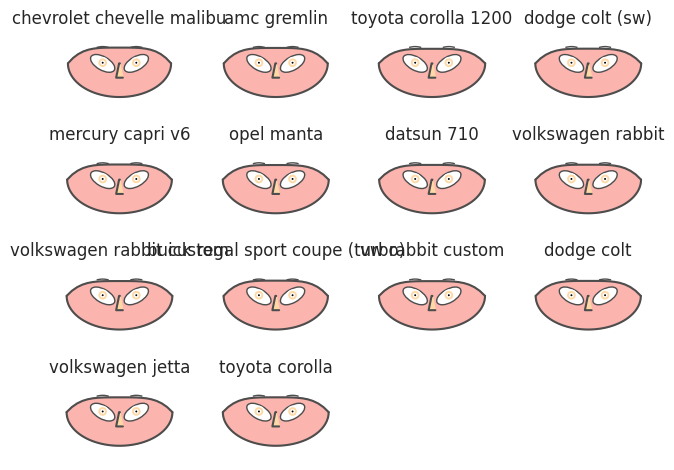

In [ ]:
fig = chernoff_face(data=datos,
                    titles=list(etiquetas),
                    color_mapper=matplotlib.cm.Pastel1)

# Mostrarlo
fig.tight_layout()
matplotlib.pyplot.show()

En este caso los autos tienes variables similares por ende no se logran ver cambios notorios en los atributos